In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("train.csv")
df.shape

(1460, 81)

In [ ]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [ ]:
missing_value_per=df.isnull().sum()/df.shape[0]*100
missing_value_per

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

In [ ]:
missing_per_20=missing_value_per[missing_value_per>17].keys()
missing_per_20

Index(['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [ ]:
df2=df.drop(columns=missing_per_20)
df2.shape

(1460, 75)

In [ ]:
df3_num=df2.select_dtypes(include=['int64','float64'])
df3_num.shape

(1460, 37)

<Axes: >

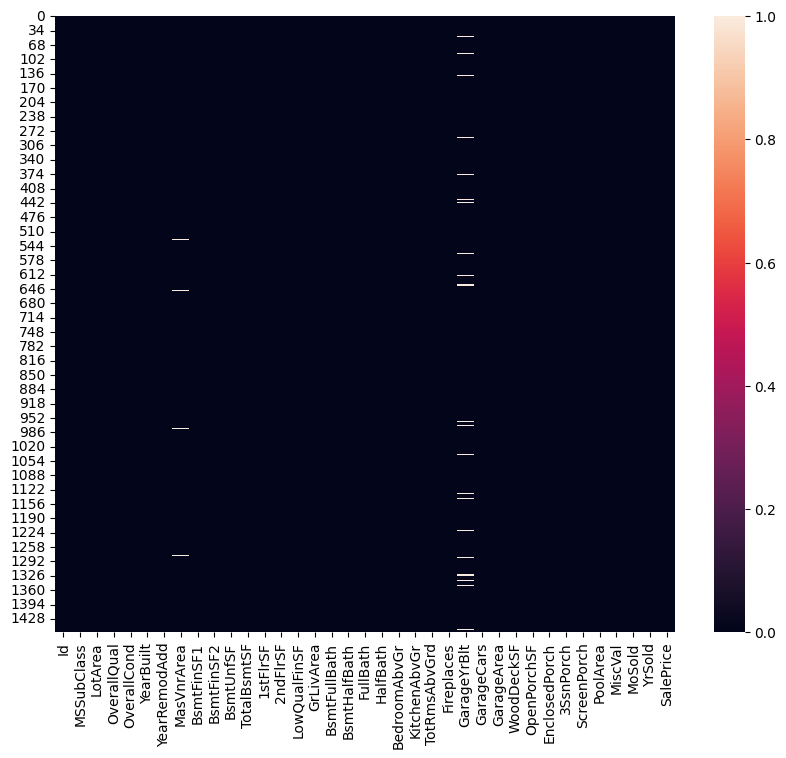

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df3_num.isnull())

In [ ]:
df3_num.isnull().sum()

Id                0
MSSubClass        0
LotArea           0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
MasVnrArea        8
BsmtFinSF1        0
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenAbvGr      0
TotRmsAbvGrd      0
Fireplaces        0
GarageYrBlt      81
GarageCars        0
GarageArea        0
WoodDeckSF        0
OpenPorchSF       0
EnclosedPorch     0
3SsnPorch         0
ScreenPorch       0
PoolArea          0
MiscVal           0
MoSold            0
YrSold            0
SalePrice         0
dtype: int64

In [ ]:
missing_num_var=[var for var in df3_num.columns if df3_num[var].isnull().sum()>0]
missing_num_var

['MasVnrArea', 'GarageYrBlt']

<ipython-input-14-6156763d6885>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3_num[var],bins=20)
<ipython-input-14-6156763d6885>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3_num[var],bins=20)


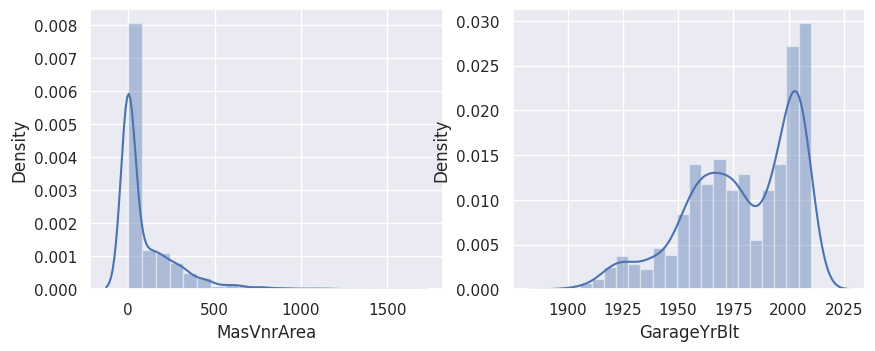

In [ ]:
plt.figure(figsize=(10,8))
sns.set()
for i,var in enumerate(missing_num_var):
  plt.subplot(2,2,i+1)
  sns.distplot(df3_num[var],bins=20)

In [ ]:
df4_num_mean=df3_num.fillna(df3_num.mean())

In [ ]:
df5_num_median=df3_num.fillna(df3_num.median())

<ipython-input-17-3fc5746a8f1a>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3_num[var],bins=20,hist=False,label="original")
<ipython-input-17-3fc5746a8f1a>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df4_num_mean[var],bins=20,hist=False,label="mean")
<ipython-input-

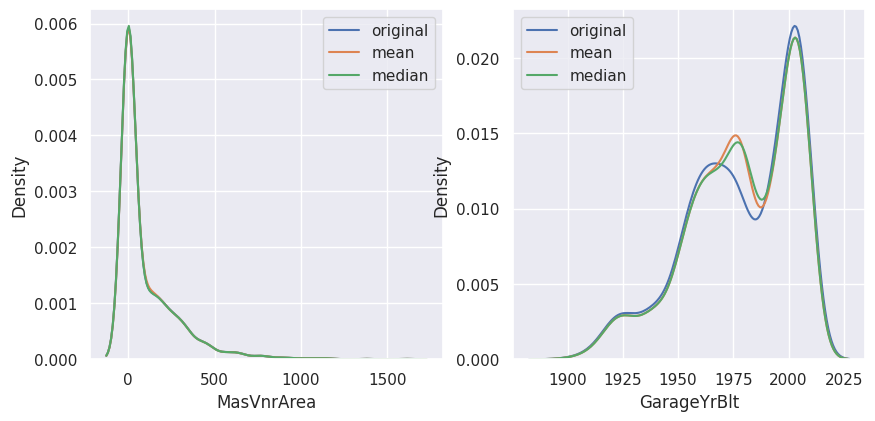

In [ ]:
plt.figure(figsize=(10,10))
sns.set()
for i,var in enumerate(missing_num_var):
  plt.subplot(2,2,i+1)
  sns.distplot(df3_num[var],bins=20,hist=False,label="original")
  sns.distplot(df4_num_mean[var],bins=20,hist=False,label="mean")
  sns.distplot(df5_num_median[var],bins=20,hist=False,label="median")
  plt.legend()

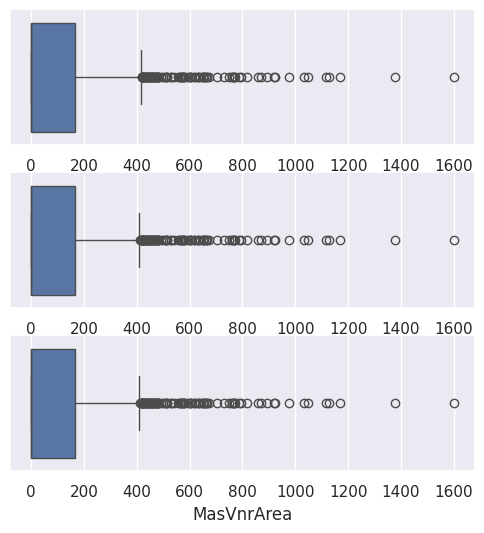

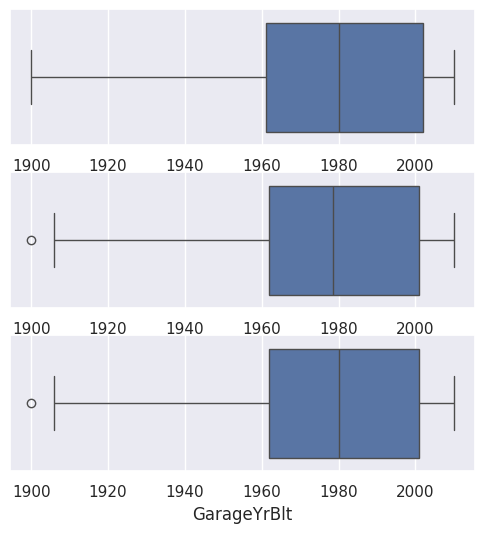

In [ ]:
for i, var in enumerate(missing_num_var):
    plt.figure(figsize=(6, 6))
    plt.subplot(3, 1, 1)
    sns.boxplot(df3_num[var], orient='h')
    plt.subplot(3, 1, 2)
    sns.boxplot(df4_num_mean[var], orient='h')
    plt.subplot(3, 1, 3)
    sns.boxplot(df5_num_median[var], orient='h')



In [28]:
df3_cat=df2.select_dtypes(include=['object'])
df3_cat.shape

(1460, 38)

In [30]:
missing_cat_var=[var for var in df3_cat.columns if df3_cat[var].isnull().sum()>0]
missing_cat_var

['MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

<ipython-input-31-f70d9499e715>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3_cat[var],bins=20)


ValueError: could not convert string to float: 'BrkFace'

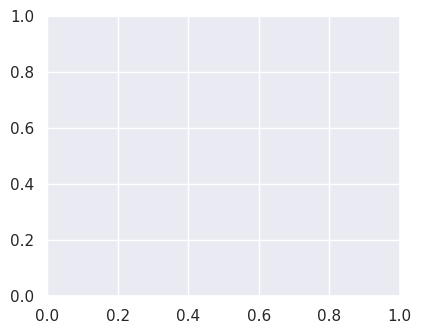

In [36]:
df3_cat.value_counts()

MSZoning  Street  LotShape  LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  Condition2  BldgType  HouseStyle  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinType2  Heating  HeatingQC  CentralAir  Electrical  KitchenQual  Functional  GarageType  GarageFinish  GarageQual  GarageCond  PavedDrive  SaleType  SaleCondition
RL        Pave    Reg       Lvl          AllPub     Inside     Gtl        CollgCr       Norm        Norm        1Fam      1Story      Gable      CompShg   VinylSd      VinylSd      BrkFace     Gd         TA         PConc       Gd        TA        Av            GLQ           Unf           GasA     Ex         Y           SBrkr       Gd           Typ         Attchd      RFn           TA          TA          Y           WD        Normal           5
RM        Pave    Reg       Lvl          AllPub     Inside     Gtl        CollgCr       Norm        Norm   

In [33]:
df4_cat_mode.isnull().sum()

MSZoning          0
Street            0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        8
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Heating           0
HeatingQC         0
CentralAir        0
Electrical        1
KitchenQual       0
Functional        0
GarageType       81
GarageFinish     81
GarageQual       81
GarageCond       81
PavedDrive        0
SaleType          0
SaleCondition     0
dtype: int64

In [41]:
df3_cat.GarageType.value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [42]:
df3_cat.GarageType.mode()[0]

'Attchd'

In [43]:
for i in df3_cat.columns:
  df4_cat_mode=df3_cat[i].mode()[0]

In [44]:
df4_cat_mode.isnull().sum()

AttributeError: 'str' object has no attribute 'isnull'

In [47]:
def fill_categorical_with_mode(df):
    # Identify categorical columns
    categorical_columns = df.select_dtypes(include=['object']).columns

    # Iterate over each categorical column
    for col in categorical_columns:
        # Calculate the mode of the column
        mode_val = df[col].mode()[0]

        # Fill missing values with mode
        df[col].fillna(mode_val, inplace=True)

In [48]:
 fill_categorical_with_mode(df3_cat)

In [51]:
df3_cat.isnull().sum()

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64